In [1]:
import scipy.stats
dist = scipy.stats.norm(400,100)

In [2]:
print(dist.pdf(400))

0.00398942280401


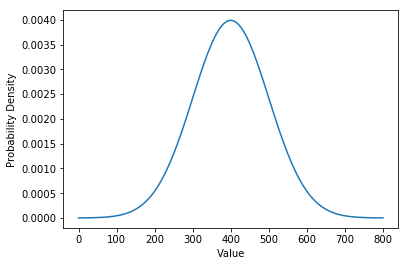

In [3]:
import matplotlib.pyplot as plt
xVals = [x*10 for x in range(0,81)]
yVals = []
for x in xVals:
    yVals.append(dist.pdf(x))
plt.plot(xVals,yVals)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

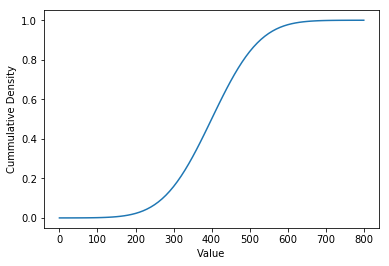

In [4]:
import matplotlib.pyplot as plt
xVals = [x*10 for x in range(0,81)]
yVals = []
for x in xVals:
    yVals.append(dist.cdf(x))
plt.plot(xVals,yVals)
plt.xlabel("Value")
plt.ylabel("Cummulative Density")
plt.show()

In [5]:
dist2 = scipy.stats.norm(600,100)
xVals = list(range(1000))
yVals1 = [dist.pdf(x) for x in xVals]
yVals2 = [dist2.pdf(x) for x in xVals]

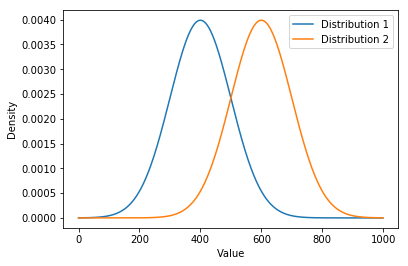

In [6]:
plt.plot(xVals,yVals1)
plt.plot(xVals,yVals2)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(["Distribution 1","Distribution 2"])
plt.show()

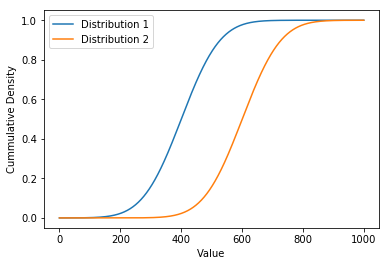

In [7]:
dist2 = scipy.stats.norm(600,100)
xVals = list(range(1000))
yVals1 = [dist.cdf(x) for x in xVals]
yVals2 = [dist2.cdf(x) for x in xVals]
plt.plot(xVals,yVals1)
plt.plot(xVals,yVals2)
plt.xlabel("Value")
plt.ylabel("Cummulative Density")
plt.legend(["Distribution 1","Distribution 2"])
plt.show()

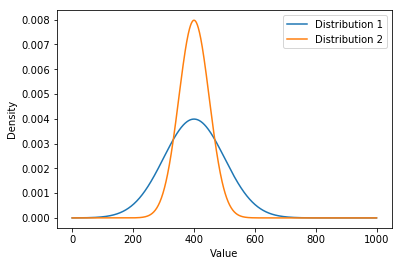

In [8]:
dist2 = scipy.stats.norm(400,50)
xVals = list(range(1000))
yVals1 = [dist.pdf(x) for x in xVals]
yVals2 = [dist2.pdf(x) for x in xVals]
plt.plot(xVals,yVals1)
plt.plot(xVals,yVals2)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(["Distribution 1","Distribution 2"])
plt.show()

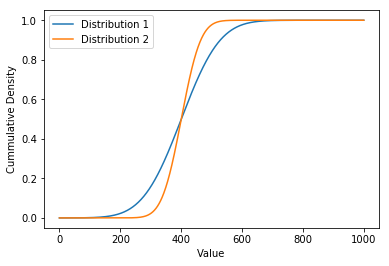

In [9]:
dist2 = scipy.stats.norm(400,50)
xVals = list(range(1000))
yVals1 = [dist.cdf(x) for x in xVals]
yVals2 = [dist2.cdf(x) for x in xVals]
plt.plot(xVals,yVals1)
plt.plot(xVals,yVals2)
plt.xlabel("Value")
plt.ylabel("Cummulative Density")
plt.legend(["Distribution 1","Distribution 2"])
plt.show()

In [10]:
import numpy as np
sample = dist.rvs(size=10000)
print(np.mean(sample))
print(np.std(sample))

399.743426241
99.3342787674


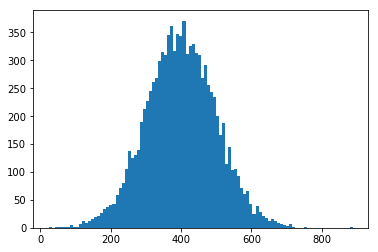

In [11]:
plt.hist(sample,bins=100)
plt.show()

In [12]:
print(sample)
print(sample>470)

[ 314.93247358  432.18668236  500.68300857 ...,  409.15701263  419.16089639
  449.21975267]
[False False  True ..., False False False]


In [13]:
print(sample[sample>470])

[ 500.68300857  500.57422812  482.91622862 ...,  523.06598586  481.12686607
  534.71898678]


In [14]:
zScores = (sample-np.mean(sample))/np.std(sample)
print(zScores)

[-0.85379341  0.32660685  1.01616062 ...,  0.09476675  0.19547603
  0.49807908]


In [15]:
print(len(zScores[abs(zScores)<1])/10000)
print(len(zScores[abs(zScores)<2])/10000)
print(len(zScores[abs(zScores)<3])/10000)

0.6889
0.953
0.997


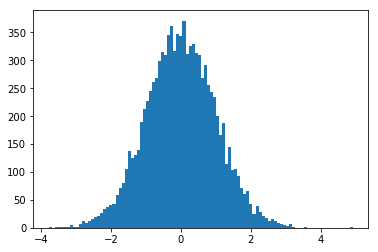

In [16]:
plt.hist(zScores,bins=100)
plt.show()

In [17]:
print(dist.cdf(500)-dist.cdf(300))
print(dist.cdf(600)-dist.cdf(200))
print(dist.cdf(700)-dist.cdf(100))

0.682689492137
0.954499736104
0.997300203937


In [18]:
xVals = list(range(800))
yVals = [dist.pdf(x) for x in xVals]
xVals2 = list(range(351))
yVals2 = [dist.pdf(x) for x in xVals2]

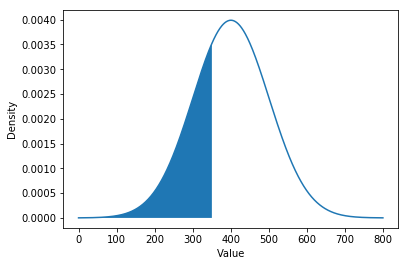

In [19]:
plt.plot(xVals,yVals)
plt.xlabel("Value")
plt.ylabel("Density")
plt.fill_between(xVals2, yVals2)
plt.show()

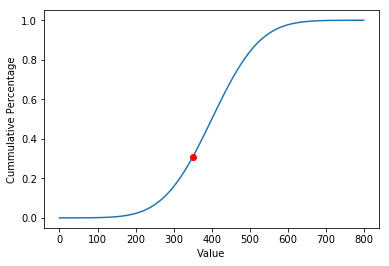

In [20]:
xVals = list(range(800))
yVals = [dist.cdf(x) for x in xVals]
plt.plot(xVals,yVals)
plt.xlabel("Value")
plt.ylabel("Cummulative Percentage")
plt.plot(350,dist.cdf(350),"ro")
plt.show()

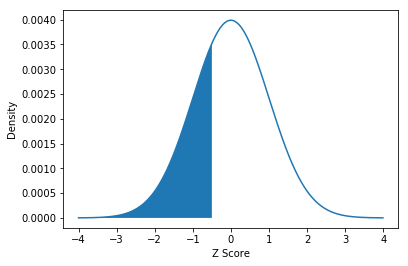

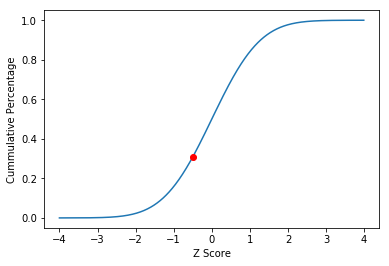

In [21]:
xVals = list(range(800))
yVals = [dist.pdf(x) for x in xVals]
xVals2 = list(range(351))
yVals2 = [dist.pdf(x) for x in xVals2]

#Translate x values to z score
xVals = [(x-400)/100 for x in xVals]
xVals2 = [(x-400)/100 for x in xVals2]

plt.plot(xVals,yVals)
plt.xlabel("Z Score")
plt.ylabel("Density")
plt.fill_between(xVals2, yVals2)
plt.show()
xVals = list(range(800))
yVals = [dist.cdf(x) for x in xVals]
xVals = [(x-400)/100 for x in xVals]
plt.plot(xVals,yVals)
plt.xlabel("Z Score")
plt.ylabel("Cummulative Percentage")
plt.plot((350-400)/100,dist.cdf(350),"ro")
plt.show()

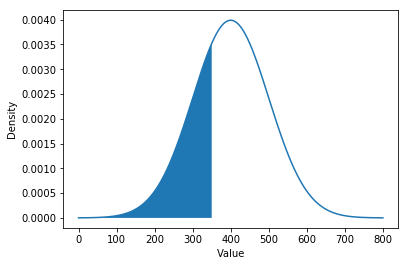

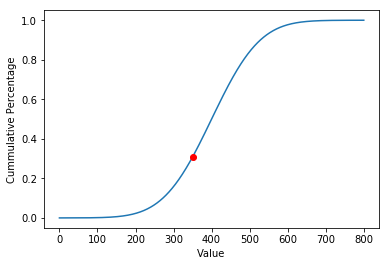

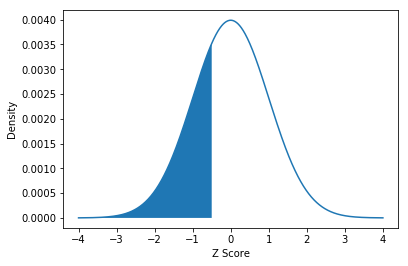

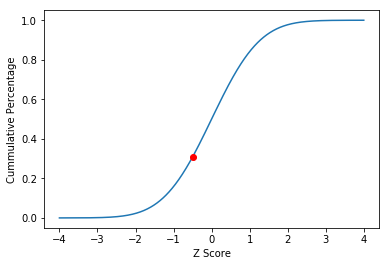

In [22]:
class normalPlotter:
    def __init__(self,dist):
        self.dist = dist
    def plot(self,xPoint,end,zScore = False):
        xVals = list(range(end+1))
        yVals = [self.dist.pdf(x) for x in xVals]
        xVals2 = list(range(xPoint+1))
        yVals2 = [self.dist.pdf(x) for x in xVals2]
        if zScore:
            xVals = [(x-self.dist.mean())/self.dist.std() for x in xVals]
            xVals2 = [(x-self.dist.mean())/self.dist.std() for x in xVals2]
        plt.plot(xVals,yVals)
        if zScore:
            plt.xlabel("Z Score")
        else:
            plt.xlabel("Value")
        plt.ylabel("Density")
        plt.fill_between(xVals2, yVals2)
        plt.show()
        
        xVals = list(range(end+1))
        yVals = [self.dist.cdf(x) for x in xVals]
        if zScore:
            xVals = [(x-self.dist.mean())/self.dist.std() for x in xVals]
        plt.plot(xVals,yVals)
        plt.xlabel("Z Score")
        plt.ylabel("Cummulative Percentage")
        
        if zScore:
            plt.xlabel("Z Score")
            plt.plot((xPoint-self.dist.mean())/self.dist.std(),dist.cdf(xPoint),"ro")

        else:
            plt.xlabel("Value")
            plt.plot(xPoint,dist.cdf(xPoint),"ro")
        
        plt.show()

x = normalPlotter(scipy.stats.norm(400,100))
x.plot(350,800)
x.plot(350,800,zScore=True)